In [1]:
import sys
sys.path.append('../src/')
from vi_hrg_log1pexp import *
from utils import *
from torch import autograd
torch.manual_seed(82)

In [2]:
def noise_r(x, R, rel_var=0.1, epsilon=1e-4):
    rs = torch.distributions.normal.Normal(x, R*rel_var).sample() 
    return torch.clamp(rs, min=0+epsilon, max=R.item()-epsilon)

In [3]:
def noise_phi(x, rel_var=0.1):
    phis = torch.distributions.normal.Normal(x, 2*np.pi*rel_var).sample()
    return phis % (2*np.pi)

In [4]:
logit = lambda x: (x/(1-x)).log()

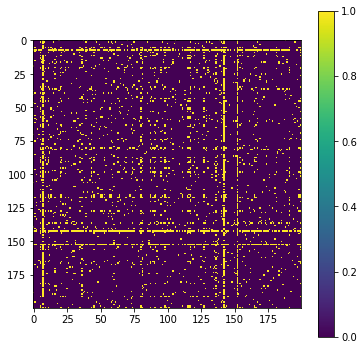

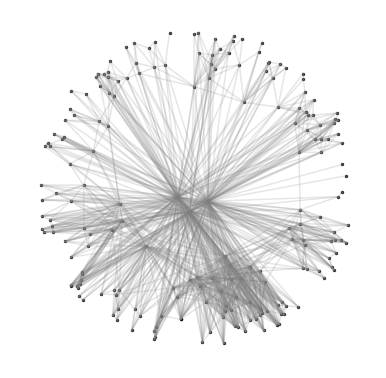

In [15]:
N = 200
R = torch.tensor([8.0]).double()
alpha = 0.8
T = 0.1

G = HRG(R=R, alpha=alpha, T=T)
r, theta, A = G.generate(N)
G.show()
G.plot()

In [16]:
A.sum().item()/N**2

0.0744

>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 18168.92 | Epoch time 1.87
Epoch 2 | LR: 0.10 | Total loss: 12977.23 | Epoch time 1.88
Epoch 3 | LR: 0.10 | Total loss: 11949.51 | Epoch time 2.10
Epoch 4 | LR: 0.10 | Total loss: 10805.06 | Epoch time 2.28
Epoch 5 | LR: 0.10 | Total loss: 10483.22 | Epoch time 2.03
Epoch 6 | LR: 0.10 | Total loss: 10007.31 | Epoch time 2.06
Epoch 7 | LR: 0.10 | Total loss: 9921.84 | Epoch time 2.49
Epoch 8 | LR: 0.10 | Total loss: 9740.48 | Epoch time 2.05
Epoch 9 | LR: 0.10 | Total loss: 9462.71 | Epoch time 2.28
Epoch 10 | LR: 0.10 | Total loss: 9495.89 | Epoch time 2.10
Epoch 11 | LR: 0.10 | Total loss: 9217.22 | Epoch time 1.94
Epoch 12 | LR: 0.10 | Total loss: 9220.61 | Epoch time 1.94
Epoch 13 | LR: 0.10 | Total loss: 8981.50 | Epoch time 1.97
Epoch 14 | LR: 0.10 | Total loss: 8887.83 | Epoch time 1.94
Epoch 15 | LR: 0.10 | Total loss: 8855.36 | Epoch time 1.97
Epoch 16 | LR: 0.10 | Total loss: 8700.44 | Epoch time 2.00
Epoch 17 | L

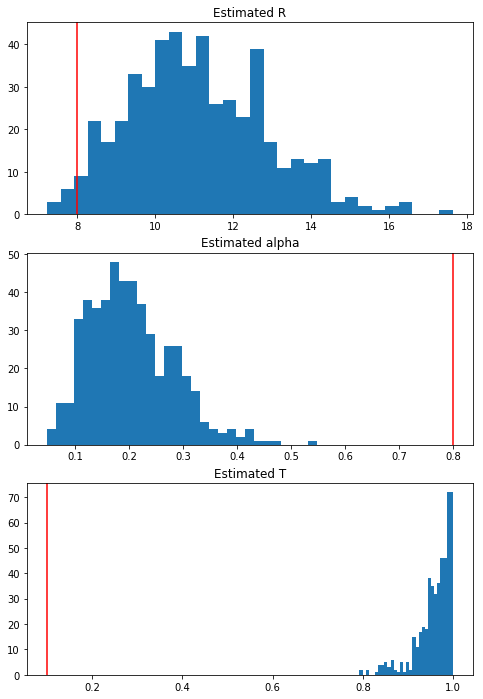

Likelihood: -7787.197526989566
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 17684.83 | Epoch time 1.83
Epoch 2 | LR: 0.10 | Total loss: 12636.51 | Epoch time 1.92
Epoch 3 | LR: 0.10 | Total loss: 11602.56 | Epoch time 1.94
Epoch 4 | LR: 0.10 | Total loss: 10873.66 | Epoch time 1.93
Epoch 5 | LR: 0.10 | Total loss: 10571.00 | Epoch time 1.92
Epoch 6 | LR: 0.10 | Total loss: 10094.38 | Epoch time 1.94
Epoch 7 | LR: 0.10 | Total loss: 9785.27 | Epoch time 1.97
Epoch 8 | LR: 0.10 | Total loss: 9773.26 | Epoch time 1.91
Epoch 9 | LR: 0.10 | Total loss: 9462.23 | Epoch time 1.98
Epoch 10 | LR: 0.10 | Total loss: 9435.76 | Epoch time 1.91
Epoch 11 | LR: 0.10 | Total loss: 9252.64 | Epoch time 1.92
Epoch 12 | LR: 0.10 | Total loss: 9258.17 | Epoch time 1.92
Epoch 13 | LR: 0.10 | Total loss: 9060.72 | Epoch time 1.93
Epoch 14 | LR: 0.10 | Total loss: 8978.83 | Epoch time 1.92
Epoch 15 | LR: 0.10 | Total loss: 8892.12 | Epoch time 1.93
Epoch 16 | LR: 0.10 | Total loss: 8874.21

../src/utils.py:121: UserWarning: a_R_ri has NaN in it!
  warnings.warn(str('%s has NaN in it!' % variable))


Infinite loop!!!
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 17632.65 | Epoch time 1.96
Epoch 2 | LR: 0.10 | Total loss: 12628.03 | Epoch time 1.99
Epoch 3 | LR: 0.10 | Total loss: 11416.46 | Epoch time 1.89
Epoch 4 | LR: 0.10 | Total loss: 10668.06 | Epoch time 1.91
Epoch 5 | LR: 0.10 | Total loss: 10181.24 | Epoch time 1.86
Epoch 6 | LR: 0.10 | Total loss: 9909.08 | Epoch time 1.90
Epoch 7 | LR: 0.10 | Total loss: 9631.09 | Epoch time 1.86
Epoch 8 | LR: 0.10 | Total loss: 9338.76 | Epoch time 1.87
Epoch 9 | LR: 0.10 | Total loss: 9305.95 | Epoch time 1.93
Epoch 10 | LR: 0.10 | Total loss: 9147.46 | Epoch time 1.89
Epoch 11 | LR: 0.10 | Total loss: 8947.79 | Epoch time 1.83
Epoch 12 | LR: 0.10 | Total loss: 8873.75 | Epoch time 1.92
Epoch 13 | LR: 0.10 | Total loss: 8766.76 | Epoch time 1.86
Epoch 14 | LR: 0.10 | Total loss: 8742.14 | Epoch time 1.90
Epoch 15 | LR: 0.10 | Total loss: 8701.01 | Epoch time 1.96
Epoch 16 | LR: 0.10 | Total loss: 8655.36 | Epoch time 1

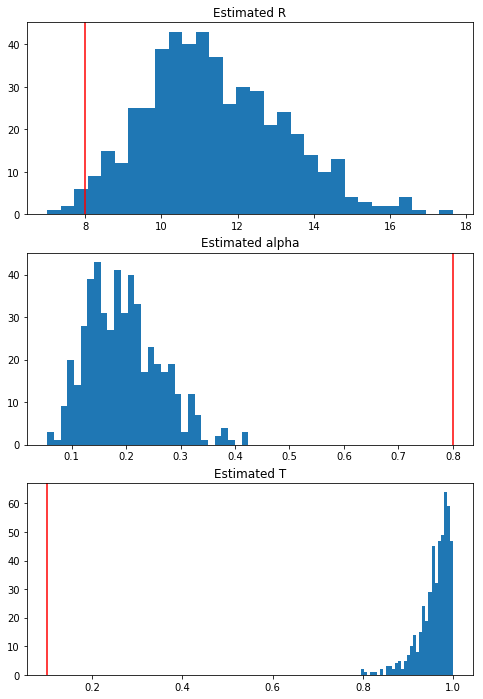

Likelihood: -7864.166974180782
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 17713.91 | Epoch time 1.97
Epoch 2 | LR: 0.10 | Total loss: 12563.99 | Epoch time 1.98
Epoch 3 | LR: 0.10 | Total loss: 11342.67 | Epoch time 1.99
Epoch 4 | LR: 0.10 | Total loss: 10701.82 | Epoch time 1.91
Epoch 5 | LR: 0.10 | Total loss: 10306.60 | Epoch time 1.97
Epoch 6 | LR: 0.10 | Total loss: 10147.76 | Epoch time 1.89
Epoch 7 | LR: 0.10 | Total loss: 9674.04 | Epoch time 1.89
Epoch 8 | LR: 0.10 | Total loss: 9505.56 | Epoch time 1.85
Epoch 9 | LR: 0.10 | Total loss: 9317.45 | Epoch time 1.95
Epoch 10 | LR: 0.10 | Total loss: 9332.35 | Epoch time 1.92
Epoch 11 | LR: 0.10 | Total loss: 9136.78 | Epoch time 1.88
Epoch 12 | LR: 0.10 | Total loss: 9032.23 | Epoch time 1.89
Epoch 13 | LR: 0.10 | Total loss: 8962.14 | Epoch time 1.88
Epoch 14 | LR: 0.10 | Total loss: 8849.70 | Epoch time 1.85
Epoch 15 | LR: 0.10 | Total loss: 8794.55 | Epoch time 1.87
Epoch 16 | LR: 0.10 | Total loss: 8691.08

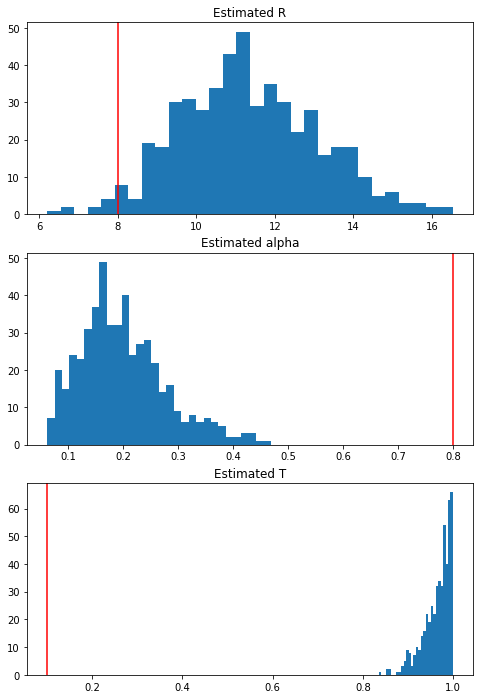

Likelihood: -7932.458162184843
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 19226.65 | Epoch time 1.93
Epoch 2 | LR: 0.10 | Total loss: 13597.54 | Epoch time 1.97
Epoch 3 | LR: 0.10 | Total loss: 12110.94 | Epoch time 1.96
Epoch 4 | LR: 0.10 | Total loss: 11456.27 | Epoch time 1.96
Epoch 5 | LR: 0.10 | Total loss: 10880.63 | Epoch time 1.99
Epoch 6 | LR: 0.10 | Total loss: 10528.65 | Epoch time 2.06
Epoch 7 | LR: 0.10 | Total loss: 10192.16 | Epoch time 1.96
Epoch 8 | LR: 0.10 | Total loss: 10083.57 | Epoch time 2.00
Epoch 9 | LR: 0.10 | Total loss: 9957.26 | Epoch time 1.95
Epoch 10 | LR: 0.10 | Total loss: 9735.72 | Epoch time 2.02
Epoch 11 | LR: 0.10 | Total loss: 9617.78 | Epoch time 1.95
Epoch 12 | LR: 0.10 | Total loss: 9451.46 | Epoch time 2.04
Epoch 13 | LR: 0.10 | Total loss: 9361.49 | Epoch time 2.06
Epoch 14 | LR: 0.10 | Total loss: 9265.96 | Epoch time 1.98
Epoch 15 | LR: 0.10 | Total loss: 9133.02 | Epoch time 1.94
Epoch 16 | LR: 0.10 | Total loss: 9048.

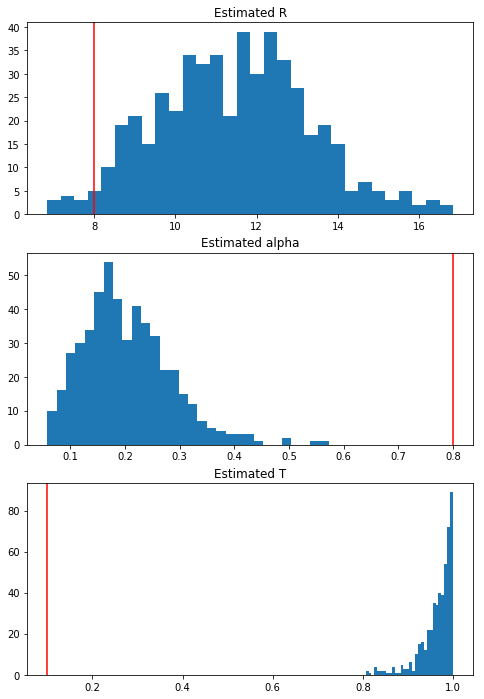

Likelihood: -8067.017193405962
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 17030.31 | Epoch time 1.85
Epoch 2 | LR: 0.10 | Total loss: 12533.45 | Epoch time 2.01
Epoch 3 | LR: 0.10 | Total loss: 11189.90 | Epoch time 1.96
Epoch 4 | LR: 0.10 | Total loss: 10556.45 | Epoch time 1.95
Epoch 5 | LR: 0.10 | Total loss: 10362.67 | Epoch time 2.03
Epoch 6 | LR: 0.10 | Total loss: 9900.84 | Epoch time 1.98
Epoch 7 | LR: 0.10 | Total loss: 9845.19 | Epoch time 2.04
Epoch 8 | LR: 0.10 | Total loss: 9592.79 | Epoch time 1.99
Epoch 9 | LR: 0.10 | Total loss: 9388.26 | Epoch time 2.01
Epoch 10 | LR: 0.10 | Total loss: 9380.43 | Epoch time 1.98
Epoch 11 | LR: 0.10 | Total loss: 9251.57 | Epoch time 1.99
Epoch 12 | LR: 0.10 | Total loss: 9088.19 | Epoch time 1.97
Epoch 13 | LR: 0.10 | Total loss: 8979.49 | Epoch time 1.99
Epoch 14 | LR: 0.10 | Total loss: 9010.75 | Epoch time 1.98
Epoch 15 | LR: 0.10 | Total loss: 8858.56 | Epoch time 1.99
Epoch 16 | LR: 0.10 | Total loss: 8858.17 

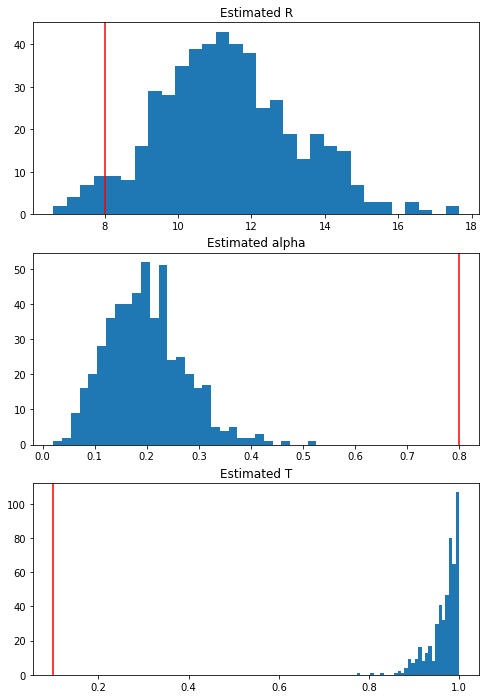

Likelihood: -7927.318644270499
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 17299.78 | Epoch time 2.02
Epoch 2 | LR: 0.10 | Total loss: 12707.02 | Epoch time 2.00
Epoch 3 | LR: 0.10 | Total loss: 11682.39 | Epoch time 2.00
Epoch 4 | LR: 0.10 | Total loss: 10877.18 | Epoch time 1.97
Epoch 5 | LR: 0.10 | Total loss: 10522.48 | Epoch time 1.94
Epoch 6 | LR: 0.10 | Total loss: 10135.14 | Epoch time 1.95
Epoch 7 | LR: 0.10 | Total loss: 10003.36 | Epoch time 1.96
Epoch 8 | LR: 0.10 | Total loss: 9654.56 | Epoch time 1.94
Epoch 9 | LR: 0.10 | Total loss: 9547.94 | Epoch time 2.03
Epoch 10 | LR: 0.10 | Total loss: 9539.90 | Epoch time 1.96
Epoch 11 | LR: 0.10 | Total loss: 9272.36 | Epoch time 1.94
Epoch 12 | LR: 0.10 | Total loss: 9189.35 | Epoch time 1.96
Epoch 13 | LR: 0.10 | Total loss: 9149.62 | Epoch time 1.99
Epoch 14 | LR: 0.10 | Total loss: 9100.80 | Epoch time 1.98
Epoch 15 | LR: 0.10 | Total loss: 9012.49 | Epoch time 1.99
Epoch 16 | LR: 0.10 | Total loss: 8942.0

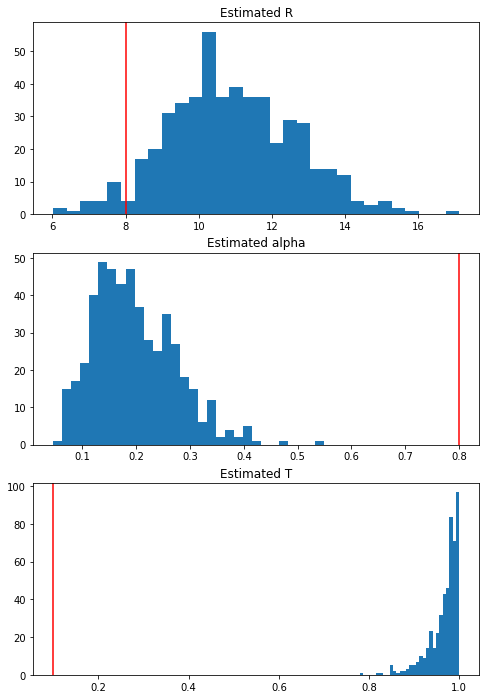

Likelihood: -7984.088991002578
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 17754.21 | Epoch time 1.82
Epoch 2 | LR: 0.10 | Total loss: 12699.59 | Epoch time 1.99
Epoch 3 | LR: 0.10 | Total loss: 11516.60 | Epoch time 1.99
Epoch 4 | LR: 0.10 | Total loss: 10732.81 | Epoch time 1.96
Epoch 5 | LR: 0.10 | Total loss: 10312.54 | Epoch time 1.99
Epoch 6 | LR: 0.10 | Total loss: 10128.35 | Epoch time 1.94
Epoch 7 | LR: 0.10 | Total loss: 9882.43 | Epoch time 1.93
Epoch 8 | LR: 0.10 | Total loss: 9631.64 | Epoch time 1.96
Epoch 9 | LR: 0.10 | Total loss: 9383.26 | Epoch time 1.96
Epoch 10 | LR: 0.10 | Total loss: 9411.15 | Epoch time 1.97
Epoch 11 | LR: 0.10 | Total loss: 9243.48 | Epoch time 2.00
Epoch 12 | LR: 0.10 | Total loss: 9113.75 | Epoch time 1.98
Epoch 13 | LR: 0.10 | Total loss: 8997.79 | Epoch time 2.04
Epoch 14 | LR: 0.10 | Total loss: 8915.98 | Epoch time 1.99
Epoch 15 | LR: 0.10 | Total loss: 8868.97 | Epoch time 2.02
Epoch 16 | LR: 0.10 | Total loss: 8851.09

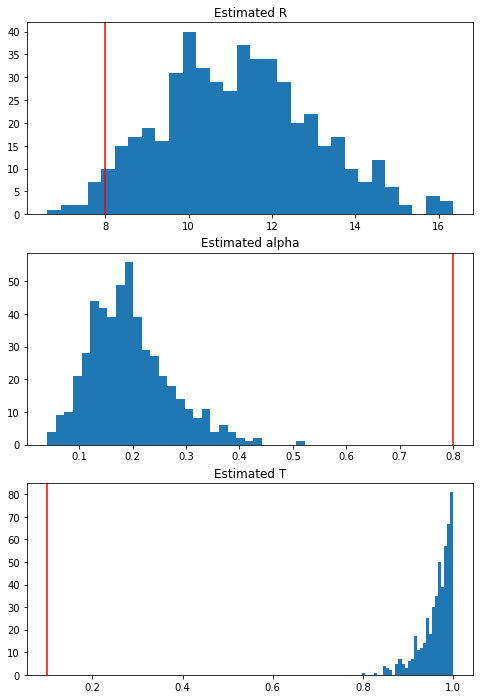

Likelihood: -7817.403895389249
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 17539.91 | Epoch time 1.94
Epoch 2 | LR: 0.10 | Total loss: 12834.30 | Epoch time 1.97
Epoch 3 | LR: 0.10 | Total loss: 11482.85 | Epoch time 1.98
Epoch 4 | LR: 0.10 | Total loss: 10861.74 | Epoch time 1.98
Epoch 5 | LR: 0.10 | Total loss: 10348.06 | Epoch time 1.98
Epoch 6 | LR: 0.10 | Total loss: 10044.44 | Epoch time 1.97
Epoch 7 | LR: 0.10 | Total loss: 9794.90 | Epoch time 1.99
Epoch 8 | LR: 0.10 | Total loss: 9710.71 | Epoch time 1.95
Epoch 9 | LR: 0.10 | Total loss: 9425.46 | Epoch time 2.03
Epoch 10 | LR: 0.10 | Total loss: 9254.81 | Epoch time 1.99
Epoch 11 | LR: 0.10 | Total loss: 9139.11 | Epoch time 1.95
Epoch 12 | LR: 0.10 | Total loss: 9106.45 | Epoch time 1.97
Epoch 13 | LR: 0.10 | Total loss: 8868.20 | Epoch time 1.95
Epoch 14 | LR: 0.10 | Total loss: 8849.00 | Epoch time 1.93
Epoch 15 | LR: 0.10 | Total loss: 8763.89 | Epoch time 1.96
Epoch 16 | LR: 0.10 | Total loss: 8727.20

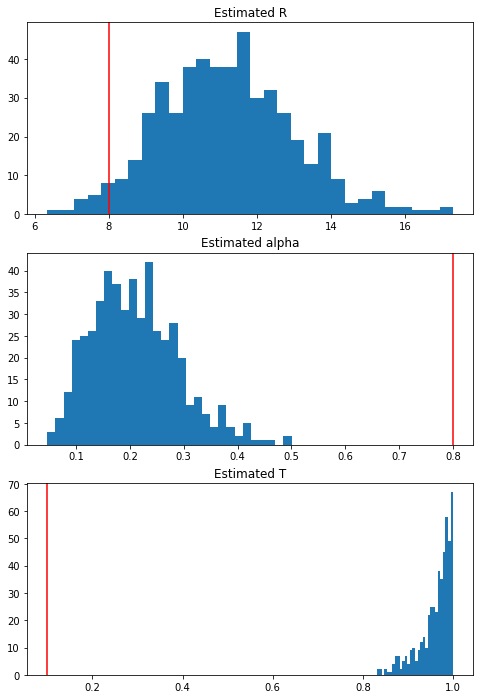

Likelihood: -7779.660015784362
>>>>>>>>>>>> Start training...
Epoch 1 | LR: 0.10 | Total loss: 17583.70 | Epoch time 1.95
Epoch 2 | LR: 0.10 | Total loss: 12721.51 | Epoch time 1.97


KeyboardInterrupt: 

In [17]:
for t in range(10):
    try:
        r_init = noise_r(r, R, rel_var=0.1)
        phi_init = noise_phi(theta, 0.1)

        r_loc_init = logit(r_init/R)
        r_scale_init = (torch.ones([N]).double()/4).log()
        phi_loc_init = polar2cart(1, phi_init)
        phi_scale_init = (torch.ones([N]).double()*30).log()
        R_conc_init = torch.tensor(10.).log()
        R_scale_init = torch.tensor(1.).log()
        alpha_conc_init = torch.tensor(.5).log()
        alpha_scale_init = torch.tensor(.5).log()
        T_init = torch.tensor([3.,10.]).log()
        dataloader = DataLoader(EdgesDataset(A), batch_size=int(N*8), num_workers=0)
        vi = VI_HRG(N,20, init_values={'rs_loc':r_loc_init,
                                        'rs_scale':r_scale_init,
                                      'phis_loc':phi_loc_init,
                                      'phis_scale':phi_scale_init, 
                                      'R_conc':R_conc_init, 
                                      'R_scale':R_scale_init,
                                      'alpha_conc':alpha_conc_init,
                                      'alpha_scale':alpha_scale_init,
                                      'T':T_init},
                   fixed={'R':None, 
                          'T':None,
                          'alpha':None},
                   priors={'R_p':torch.tensor([20., 0.4]), 
                            'T_p':torch.tensor([1., 15.]),
                            'alpha_p':torch.tensor([27., 0.03])},)
        vi.train(dataloader, lrs=[0.1], debug=False, epochs=30)
        r_x_loc, r_x_scale, phi_x_loc, phi_x_scale, R_x_conc, R_x_scale, T_x, \
            alpha_x_conc, alpha_x_scale = vi.constrained_params()
        hist_samples = [500]
        bins = 30
        R_samples = Gamma(R_x_conc, R_x_scale.reciprocal()).sample(hist_samples)
        alpha_samples = Gamma(alpha_x_conc, alpha_x_scale.reciprocal()).sample(hist_samples)
        T_samples = Beta(T_x[0], T_x[1]).sample(hist_samples)
        plt.figure(figsize=(8,12))
        
        plt.subplot(3, 1, 1)
        plt.hist(R_samples.numpy(), bins=bins)
        plt.axvline(R.item(), color='r')
        plt.title('Estimated R')
        
        plt.subplot(3, 1, 2)
        plt.hist(alpha_samples.numpy(), bins=bins)
        plt.axvline(alpha, color='r')
        plt.title('Estimated alpha')
        
        plt.subplot(3, 1, 3)
        plt.hist(T_samples.numpy(), bins=bins)
        plt.axvline(T, color='r')
        plt.title('Estimated T')
        plt.show()
        print('Likelihood:', vi.likelihood())
    except Exception as e: 
        print(e)